## Topic Modelling using LDA

### In the previous notebook (https://github.com/ameyn21/Clustering-Documents-using-K-means/blob/master/Clustering_of_jobs_using_K_means_8_clusters_Indeed.ipynb) we performed K-means clustering on a set of job description to get 8 clusters of documents.

### We will perform Topic Modelling on these 8 clusters to know more about these clusters

### 1) Import neccesary libraries

In [7]:
import ast
import re
import nltk 
import numpy as np 
from nltk.corpus import stopwords # Filter out stopwords, such as 'the', 'or', 'and'
import pandas as pd
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from wordcloud import WordCloud
from collections import Counter 

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amey.naik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 2) Loading the dataset

In [15]:
df_jobs = pd.read_csv("C:\Data_Science_Lab\Github\Topic-Modelling-using-LDA\job_clustering_indeed.csv")

In [16]:
df_jobs.head()

,Unnamed: 0,Unnamed: 0.1,job_title,company_name,description,ClusterLabel_Aff_Prop,ClusterLabel_kmeans
0,0,1,"Data Scientist, Analytics, BI Engineer",RAACOM Infosystems,"['spark', 'title', 'large', 'intelligence', 'j...",-1,2
1,1,2,Data Scientist,Amazon Dev Center India - Hyd,"['spark', 'title', 'world', 'large', 'intellig...",-1,0
2,2,3,Machine Learning Engineer,WAVELABS TECHNOLOGIES,"['classification', 'title', 'reinvent', 'ourse...",-1,0
3,3,4,Sr. Clinical Data Analyst,Makrocare,"['planning', 'title', 'device', 'excellent', '...",-1,0
4,4,5,Data Analyst,GE Appliances,"['title', 'made', 'excellent', 'amounts', 'sta...",-1,0


#### Let us work with the "description_" column which is a cleaned (pre-processed) version of the "description" column. 

In [17]:
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [ast.literal_eval(df_jobs['description'][ind]) for ind in df_jobs.index]

### 3) Bag of words on the dataset

In [18]:
dictionary = gensim.corpora.Dictionary(tokenized_corpus)

In [19]:
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_corpus]

### 4) Running LDA on Bag of words corpus

In [20]:
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# TODO
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 20, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

### 5) Generate wordcloud's of all the topics in each clusters

In [25]:
def Generate_Wordcloud_For_Each_Cluster(wpt, num_clusters):
    for i in range(num_clusters):
        df_docs = df_jobs[df_jobs['ClusterLabel_kmeans'] == i]
        tokenized_corpus = [ast.literal_eval(df_jobs['description'][ind]) for ind in df_docs.index]
        dictionary = gensim.corpora.Dictionary(tokenized_corpus)
        bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_corpus]

        lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = 5, 
                                       id2word = dictionary,                                    
                                       passes = 10,
                                       workers = 2)


        dict_of_topics = Counter({})
        for topic in range(lda_model.num_topics):
            dict_of_topics = dict_of_topics + Counter(dict(lda_model.show_topic(topic, 20)))

        plt.figure()
        plt.imshow(WordCloud().fit_words(dict(dict_of_topics)))
        plt.axis("off")
        plt.title("Topics for cluster #" + str(i))
    
  


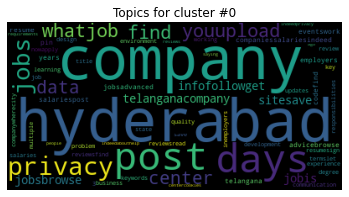

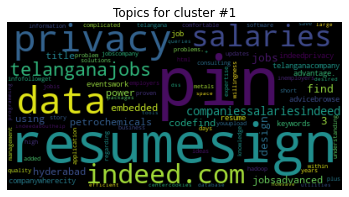

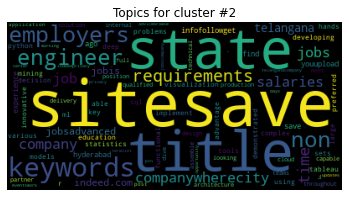

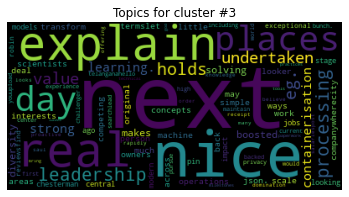

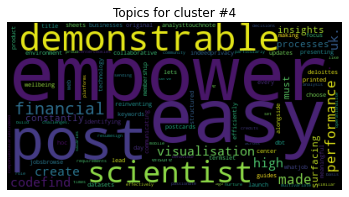

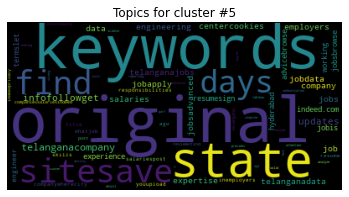

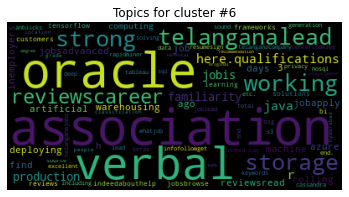

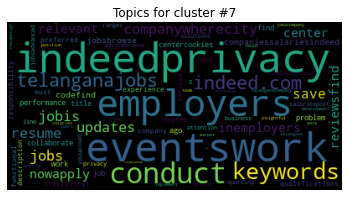

In [26]:
wpt = nltk.WordPunctTokenizer()
Generate_Wordcloud_For_Each_Cluster(wpt, 8)